# Web Scraping

In [ ]:
import requests
from bs4 import BeautifulSoup
import json
import pathlib
import requests
from bs4 import BeautifulSoup
import random
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# URL da vítima
url = "https://www.gov.br/saude/pt-br/assuntos/noticias?b_start:int=75"

# Cabeçalho para simular um navegador
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36"
}

In [ ]:
response = requests.get(url, headers=headers)
response
# <Response [200]> -> requisição foi bem-sucedida

<Response [200]>

In [ ]:
soup = BeautifulSoup(response.text, "html.parser")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
soup

<!DOCTYPE html>

<html lang="pt-br" xml:lang="pt-br" xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta charset="utf-8"/>
<!-- Google Tag Manager -->
<script type="text">(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
  new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
  j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
  'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
  })(window,document,'script','dataLayer','GTM-NHZSKTD');</script>
<!-- End Google Tag Manager -->
<script type="application/ld+json">
        {
            "@context": "https://schema.org",
            "@type": "Organization",
            "url": "https://www.gov.br/saude",
            "logo": "https://www.gov.br/saude/logo.png"
        }</script>
<script type="application/ld+json">
        {
            "@context": "https://schema.org",
            "@type": "WebSite",
            "url": "https://www.gov.br/saude",
            "pote

In [ ]:
# Exibe o html como texto
print(soup.get_text())















































Notícias — Ministério da Saúde
























Ir para o
      Conteúdo
      1


Ir para a
      Página Inicial
      2


Ir para o menu de
      Navegação
      3


Ir para a
      Busca
      4


Ir para o
      Mapa do site
      5




Atenção!
Seu navegador não pode executar javascript. Alguns recursos podem não funcionar corretamente.











Abrir menu principal de navegação






Ministério da Saúde





                        Termos mais buscados
                    




                                   assinatura
                                




                                   inss
                                




                                   enem
                                




                                   mei
                                




                                   imposto de renda
                                







                        Termos mais buscados
       

In [ ]:
# Localizando o bloco com o id "textoMateria"
bloco_noticias = soup.find_all("article", class_="tileItem")
print(bloco_noticias)

[<article class="tileItem visualIEFloatFix tile-collective-nitf-content">
<div class="tileContent">
<div class="tileImage">
<a href="https://www.gov.br/saude/pt-br/assuntos/noticias/2024/dezembro/construcao-de-ambientes-de-trabalho-humanizados-na-saude-e-debatido-em-conferencia">
<img alt="conferencia cngtes.jpg" class="tileImage" height="59" src="https://www.gov.br/saude/pt-br/assuntos/noticias/2024/dezembro/construcao-de-ambientes-de-trabalho-humanizados-na-saude-e-debatido-em-conferencia/conferencia-cngtes.jpg/@@images/ede0d542-8232-431f-bb50-fd79246f85ec.jpeg" width="128"/>
</a>
</div>
<span class="subtitle">PARTICIPAÇÃO SOCIAL</span>
<h2 class="tileHeadline">
<a class="summary url" href="https://www.gov.br/saude/pt-br/assuntos/noticias/2024/dezembro/construcao-de-ambientes-de-trabalho-humanizados-na-saude-e-debatido-em-conferencia" title="collective.nitf.content">Construção de ambientes de trabalho humanizados na Saúde é debatido em conferência</a>
</h2>
<p class="tileBody">
<span

In [ ]:
links = [bloco.find("a", class_="summary url")["href"] for bloco in bloco_noticias]


In [ ]:
links

['https://www.gov.br/saude/pt-br/assuntos/noticias/2024/dezembro/construcao-de-ambientes-de-trabalho-humanizados-na-saude-e-debatido-em-conferencia',
 'https://www.gov.br/saude/pt-br/assuntos/noticias/2024/dezembro/saude-aprova-recursos-para-gestores-estaduais-e-municipais-executarem-programa-mais-acesso-a-especialistas',
 'https://www.gov.br/saude/pt-br/assuntos/noticias/2024/dezembro/integrisaude-ministerio-da-saude-lanca-programa-para-garantir-integridade',
 'https://www.gov.br/saude/pt-br/assuntos/noticias/2024/dezembro/saude-divulga-resultado-preliminar-de-projetos-aprovados-nos-programas-de-atencao-oncologica-e-de-apoio-a-pessoa-com-deficiencia',
 'https://www.gov.br/saude/pt-br/assuntos/noticias/2024/dezembro/mais-medicos-registra-quase-7-mil-novos-profissionais-em-2024',
 'https://www.gov.br/saude/pt-br/assuntos/noticias/2024/dezembro/hospital-de-bonsucesso-recebera-mil-novos-funcionarios-ate-a-proxima-semana',
 'https://www.gov.br/saude/pt-br/assuntos/noticias/2024/dezembro/sa

## Acessando as notícias

In [ ]:
links = [link for link in links if "/assuntos/noticias" in link]

for link in links:
    print(link)

https://www.gov.br/saude/pt-br/assuntos/noticias/2024/dezembro/construcao-de-ambientes-de-trabalho-humanizados-na-saude-e-debatido-em-conferencia
https://www.gov.br/saude/pt-br/assuntos/noticias/2024/dezembro/saude-aprova-recursos-para-gestores-estaduais-e-municipais-executarem-programa-mais-acesso-a-especialistas
https://www.gov.br/saude/pt-br/assuntos/noticias/2024/dezembro/integrisaude-ministerio-da-saude-lanca-programa-para-garantir-integridade
https://www.gov.br/saude/pt-br/assuntos/noticias/2024/dezembro/saude-divulga-resultado-preliminar-de-projetos-aprovados-nos-programas-de-atencao-oncologica-e-de-apoio-a-pessoa-com-deficiencia
https://www.gov.br/saude/pt-br/assuntos/noticias/2024/dezembro/mais-medicos-registra-quase-7-mil-novos-profissionais-em-2024
https://www.gov.br/saude/pt-br/assuntos/noticias/2024/dezembro/hospital-de-bonsucesso-recebera-mil-novos-funcionarios-ate-a-proxima-semana
https://www.gov.br/saude/pt-br/assuntos/noticias/2024/dezembro/sabemos-que-75-dos-focos-do-

## Testando apenas uma notícia

In [ ]:
full_url =  links[1]  # Construindo a URL completa
response = requests.get(full_url, headers=headers)

In [ ]:
full_url

'https://www.gov.br/saude/pt-br/assuntos/noticias/2024/dezembro/saude-aprova-recursos-para-gestores-estaduais-e-municipais-executarem-programa-mais-acesso-a-especialistas'

In [ ]:
soup = BeautifulSoup(response.text, "html.parser")

In [ ]:
print(soup.get_text(separator="\n").strip())

Saúde aprova recursos para gestores estaduais e municipais executarem Programa Mais Acesso a Especialistas — Ministério da Saúde
























































Ir para o

      Conteúdo
      
1






Ir para a

      Página Inicial
      
2






Ir para o menu de

      Navegação
      
3






Ir para a

      Busca
      
4






Ir para o

      Mapa do site
      
5










Atenção!


Seu navegador não pode executar javascript. Alguns recursos podem não funcionar corretamente.
























Abrir menu principal de navegação














Ministério da Saúde











                        Termos mais buscados
                    









                                   assinatura
                                









                                   inss
                                









                                   enem
                                









                                   mei
                

In [ ]:
# Extraindo o título
title = soup.find("meta", property="og:title")["content"]

# Extraindo a descrição
description = soup.find("meta", attrs={"name": "description"})["content"]

#Extraindo o subtítulo
subtitle = soup.find("p", property="rnews:alternativeHeadline").get_text()

# Extraindo a categoria
categoria = soup.find("div", id="form-widgets-categoria").get_text(strip=True)

#Extraindo o nome da pessoa que escreveu a matéria
nome_autora = soup.find("div", property="rnews:articleBody").find_all("p")[-1]

# Exibindo os resultados
print("Título:", title)
print("Sub-Título:", subtitle)
print("Descrição:", description)
print("Categoria:", categoria)
print("Autora:", nome_autora)


Título: Saúde aprova recursos para gestores estaduais e municipais executarem Programa Mais Acesso a Especialistas
Sub-Título: INVESTIMENTO
Descrição: No total, estão sendo investidos R$ 2,4 bilhões nas áreas de oncologia, cardiologia, oftalmologia, otorrinolaringologia e ortopedia
Categoria: Saúde e Vigilância Sanitária
Autora: <p class=""><em>Nathan Victor</em><br/><em>Ministério da Saúde</em></p>


In [ ]:
tags = []
div_tags = soup.find("div", class_="column").find("div", id="category")
links_tags = div_tags.find_all("a", class_="link-category")
for link in links_tags:
    tags.append(link.get_text())
print(tags)

['atenção especializada à saúde', 'mais acesso a especialistas', 'assistência', 'recursos']


In [ ]:
data_publicacao = soup.find("span", class_="documentPublished")
if data_publicacao:
    data_texto = data_publicacao.find("span", class_="value").text.strip()
    data_formatada = data_texto.split(' ')[0]
print(data_formatada)

12/12/2024


In [ ]:
#texto da matéria
article_body = soup.find("div", property="rnews:articleBody")
paragraphs = article_body.find_all("p")
if paragraphs:
    paragraphs.pop()
texto_materia = "\n\n".join(p.get_text(strip=True) for p in paragraphs)

print(texto_materia)

O Ministério da Saúde publicou, nesta quinta-feira (12), portarias que oficializam a aprovação dos Planos de Ação Regionais para execução do Programa Mais Acesso a Especialistas. A iniciativa marca a modernização doSistema Único de Saúde (SUS)com foco na redução de filas, maior eficiência no atendimento e integração entre as atenções primária e especializada.

“Estamos fazendo com que o paciente não tenha de peregrinar buscando atendimento. Ou seja, ele terá um fluxo coordenador, com início na UBS”, explica a ministra da Saúde, Nísia Trindade.

No total, estão sendo investidos R$ 2,4 bilhões nas áreas de oncologia, cardiologia, oftalmologia, otorrinolaringologia e ortopedia. Essas são as chamadas cinco ofertas de cuidados integrados (OCI), que estão no foco inicial dos investimentos do programa.

Para a efetivação da transferência do recurso financeiro por parte do Ministério da Saúde, o estado do deverá encaminhar, por meio de resolução decidida pela Comissão Intergestores Bipartite (

In [ ]:
informacoes = {
        "url": full_url,
        "titulo": title,
        "descricao": description,
        "subtitulo": subtitle,
        "categoria": categoria,
        "autora": nome_autora,
        "tags": tags,
        "data_publi": data_formatada,
        "texto": texto_materia
    }

In [ ]:
informacoes

{'url': 'https://www.gov.br/saude/pt-br/assuntos/noticias/2024/dezembro/saude-aprova-recursos-para-gestores-estaduais-e-municipais-executarem-programa-mais-acesso-a-especialistas',
 'titulo': 'Saúde aprova recursos para gestores estaduais e municipais executarem Programa Mais Acesso a Especialistas',
 'descricao': 'No total, estão sendo investidos R$ 2,4 bilhões nas áreas de oncologia, cardiologia, oftalmologia, otorrinolaringologia e ortopedia',
 'subtitulo': 'INVESTIMENTO',
 'categoria': 'Saúde e Vigilância Sanitária',
 'autora': <p class=""><em>Nathan Victor</em><br/><em>Ministério da Saúde</em></p>,
 'tags': ['atenção especializada à saúde',
  'mais acesso a especialistas',
  'assistência',
  'recursos'],
 'data_publi': '12/12/2024',
 'texto': 'O Ministério da Saúde publicou, nesta quinta-feira (12), portarias que oficializam a aprovação dos Planos de Ação Regionais para execução do Programa Mais Acesso a Especialistas. A iniciativa marca a modernização doSistema Único de Saúde (SU

In [ ]:
import time
import random

In [ ]:
numero_paginas = 15*140
links_noticias = []

for p in range(0, numero_paginas , 15):
    url = f"https://www.gov.br/saude/pt-br/assuntos/noticias?b_start:int={p}"
    response = requests.get(url, headers=headers)

    print(p, response)

    soup = BeautifulSoup(response.text, "html.parser")
    bloco_noticias = soup.find_all("article", class_="tileItem")

    links = [bloco.find("a", class_="summary url")["href"] for bloco in bloco_noticias]
    links = [link for link in links if "/assuntos/noticias" in link]

    links_noticias += links

    # Esperar alguns segundos antes de ir para a próxima página
    tempo_espera = random.uniform(0, 0.01)
    time.sleep(tempo_espera)

0 <Response [200]>
15 <Response [200]>
30 <Response [200]>
45 <Response [200]>
60 <Response [200]>
75 <Response [200]>
90 <Response [200]>
105 <Response [200]>
120 <Response [200]>
135 <Response [200]>
150 <Response [200]>
165 <Response [200]>
180 <Response [200]>
195 <Response [200]>
210 <Response [200]>
225 <Response [200]>
240 <Response [200]>
255 <Response [200]>
270 <Response [200]>
285 <Response [200]>
300 <Response [200]>
315 <Response [200]>
330 <Response [200]>
345 <Response [200]>
360 <Response [200]>
375 <Response [200]>
390 <Response [200]>
405 <Response [200]>
420 <Response [200]>
435 <Response [200]>
450 <Response [200]>
465 <Response [200]>
480 <Response [200]>
495 <Response [200]>
510 <Response [200]>
525 <Response [200]>
540 <Response [200]>
555 <Response [200]>
570 <Response [200]>
585 <Response [200]>
600 <Response [200]>
615 <Response [200]>
630 <Response [200]>
645 <Response [200]>
660 <Response [200]>
675 <Response [200]>
690 <Response [200]>
705 <Response [200]>


In [ ]:
links_noticias = links_noticias[1:]

In [ ]:
len(links_noticias)

2100

In [ ]:
import json
import pathlib
import requests
from bs4 import BeautifulSoup
import random
import time

# Diretório onde os arquivos serão salvos
data_dir = pathlib.Path("data_2000")
data_dir.mkdir(parents=True, exist_ok=True)  # Garante que o diretório será criado, se necessário


for i, link in enumerate(links_noticias):
    full_url = link  # Construindo a URL completa
    response = requests.get(full_url, headers=headers)

    soup = BeautifulSoup(response.text, "html.parser")

    # Extração segura dos dados
    title = soup.find("meta", property="og:title")
    title = title["content"] if title else ""

    description = soup.find("meta", attrs={"name": "description"})
    description = description["content"] if description else ""

    subtitle = soup.find("p", property="rnews:alternativeHeadline")
    subtitle = subtitle.get_text() if subtitle else ""

    categoria = soup.find("div", id="form-widgets-categoria")
    categoria = categoria.get_text(strip=True) if categoria else ""

    # Extraindo o nome da autora, com verificação
    nome_autora = soup.find("div", property="rnews:articleBody")
    nome_autora = nome_autora.find_all("p")[-1].get_text(strip=True) if nome_autora else ""

    tags = []
    div_tags = soup.find("div", class_="column")
    if div_tags:
        div_tags = div_tags.find("div", id="category")
        if div_tags:
            links_tags = div_tags.find_all("a", class_="link-category")
            for link in links_tags:
                tags.append(link.get_text())

    data_publicacao = soup.find("span", class_="documentPublished")
    data_formatada = ""
    if data_publicacao:
        data_texto = data_publicacao.find("span", class_="value")
        data_formatada = data_texto.text.strip().split(' ')[0] if data_texto else ""

    article_body = soup.find("div", property="rnews:articleBody")
    texto_materia = ""
    if article_body:
        paragraphs = article_body.find_all("p")
        if paragraphs:
            paragraphs.pop()  # Remove o último parágrafo, se necessário
        texto_materia = "\n\n".join(p.get_text(strip=True) for p in paragraphs)

    # Estrutura do dicionário com informações extraídas
    informacoes = {
        "url": full_url,
        "titulo": title,
        "descricao": description,
        "subtitulo": subtitle,
        "categoria": categoria,
        "autora": nome_autora,
        "tags": tags,
        "data_publi": data_formatada,
        "texto": texto_materia
    }

    filename = f"noticia_{i}.json"
    file_path = data_dir / filename

    # Escreve as informações no arquivo JSON
    with file_path.open("w", encoding="utf-8") as f:
        json.dump(informacoes, f, ensure_ascii=False, indent=4)

    # Exibir o caminho no formato do Windows
    print(f"Arquivo salvo: {file_path.resolve()}")

    # Aguarda antes do próximo request para evitar sobrecarregar o servidor
    tempo_espera = random.uniform(0, 0.5)
    time.sleep(tempo_espera)


Arquivo salvo: /content/data_2000/noticia_0.json
Arquivo salvo: /content/data_2000/noticia_1.json
Arquivo salvo: /content/data_2000/noticia_2.json
Arquivo salvo: /content/data_2000/noticia_3.json
Arquivo salvo: /content/data_2000/noticia_4.json
Arquivo salvo: /content/data_2000/noticia_5.json
Arquivo salvo: /content/data_2000/noticia_6.json
Arquivo salvo: /content/data_2000/noticia_7.json
Arquivo salvo: /content/data_2000/noticia_8.json
Arquivo salvo: /content/data_2000/noticia_9.json
Arquivo salvo: /content/data_2000/noticia_10.json
Arquivo salvo: /content/data_2000/noticia_11.json
Arquivo salvo: /content/data_2000/noticia_12.json
Arquivo salvo: /content/data_2000/noticia_13.json
Arquivo salvo: /content/data_2000/noticia_14.json
Arquivo salvo: /content/data_2000/noticia_15.json
Arquivo salvo: /content/data_2000/noticia_16.json
Arquivo salvo: /content/data_2000/noticia_17.json
Arquivo salvo: /content/data_2000/noticia_18.json
Arquivo salvo: /content/data_2000/noticia_19.json
Arquivo sa

IndexError: list index out of range

In [ ]:
#Salvar arquivo para meu PC pessoal
import shutil
from google.colab import files

# Caminho da pasta que você quer baixar
folder_path = "/content/data_2000"

# Caminho do arquivo zip que será criado
zip_path = "/content/data_2000.zip"

# Compactar a pasta em um arquivo .zip
shutil.make_archive(folder_path, 'zip', folder_path)


files.download(zip_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Análise das notícias coletadas

In [ ]:
import matplotlib.pyplot as plt

# Caminho da pasta com os arquivos JSON
data_dir = pathlib.Path(r"/content/drive/MyDrive/10º SEMESTRE/LABORATORIO/Atividade 4/Dataset")

# Contador para as tags
tag_counter = {}

# Abrindo e processando os arquivos JSON
for json_file in data_dir.rglob("*.json"):
    with json_file.open("r", encoding="utf-8") as f:
        data = json.load(f)
        tags = data.get("tags", [])  # Obtém a lista de tags
        for tag in tags:
            if tag in tag_counter:
                tag_counter[tag] += 1
            else:
                tag_counter[tag] = 1

## Tags mais frequentes das notícias do Ministério da Saúde

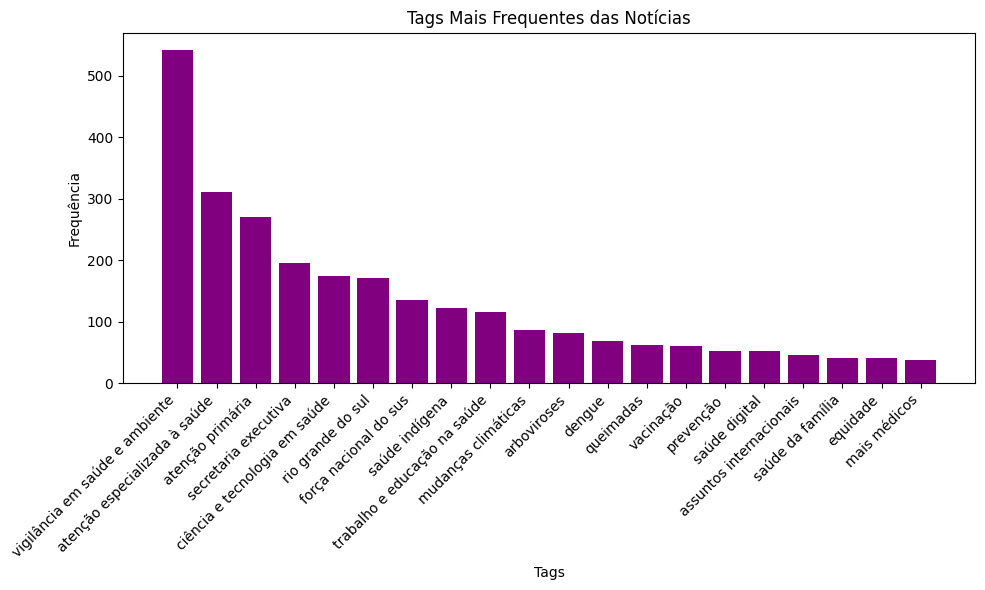

In [ ]:
# Criando o dicionário com as tags e suas contagens
tag_count_dict = dict(sorted(tag_counter.items(), key=lambda x: x[1], reverse=True))

# Selecionando as tags mais comuns
top_tags = list(tag_count_dict.items())[:20]  # Top 20 tags mais frequentes

# Separando os dados para o gráfico
labels, values = zip(*top_tags)

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.bar(labels, values,color='purple')
plt.xlabel("Tags")
plt.ylabel("Frequência")
plt.title("Tags Mais Frequentes das Notícias")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Número de notícias por mês coletadas

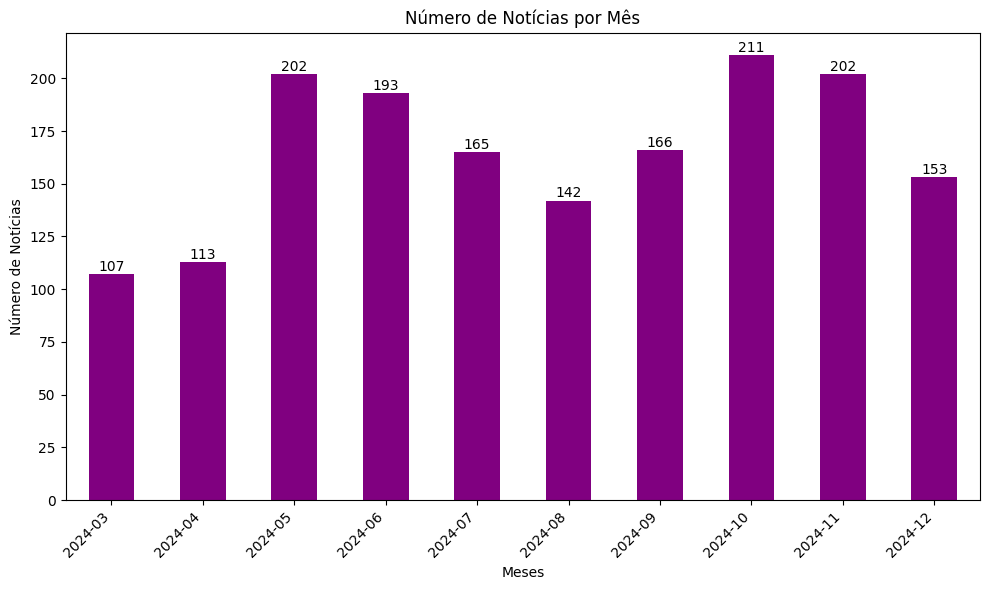

In [ ]:
from datetime import datetime
import pandas as pd
dates = []

# Lendo os arquivos JSON
for json_file in data_dir.rglob("*.json"):
    with open(json_file, "r", encoding="utf-8") as f:
        entry = json.load(f)  # Carrega o conteúdo do JSON como um dicionário
        date_str = entry.get("data_publi", "")  # Data no formato "dd/mm/yyyy"
        if date_str:
            try:
                # Converter data no formato "dd/mm/yyyy" para datetime
                date = datetime.strptime(date_str, "%d/%m/%Y")
                month = date.strftime("%Y-%m")  # Extrair ano e mês (ex: 2024-11)
                dates.append(month)
            except ValueError:
                print(f"Data inválida no arquivo: {json_file} ({date_str})")

# Criando um DataFrame com as datas
date_df = pd.DataFrame(dates, columns=["month"])

# Contando as notícias por mês
monthly_counts = date_df["month"].value_counts().sort_index()

# Criando o gráfico
plt.figure(figsize=(10, 6))
ax = monthly_counts.plot(kind='bar', color='purple')

# Adicionando os rótulos em cima das barras
for i, count in enumerate(monthly_counts):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10)

# Ajustando o gráfico
plt.xlabel("Meses")
plt.ylabel("Número de Notícias")
plt.title("Número de Notícias por Mês")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
data

{'url': 'https://www.gov.br/saude/pt-br/assuntos/noticias/2024/setembro/governo-federal-destina-mais-de-r-500-milhoes-para-enfrentamento-as-queimadas',
 'titulo': 'Governo Federal destina mais de R$ 500 milhões para enfrentamento às queimadas',
 'descricao': 'Em reunião com o presidente da República e chefes de outros Poderes, na terça (17), Nísia Trindade reforçou medidas do Ministério da Saúde para mitigar impactos da fumaça na saúde da população',
 'subtitulo': 'SAÚDE & AMBIENTE',
 'categoria': 'Saúde e Vigilância Sanitária',
 'autora': 'Vanessa RodriguesMinistério da Saúde',
 'tags': ['vigilância em saúde e ambiente',
  'mudanças climáticas',
  'queimadas',
  'fumaça'],
 'data_publi': '18/09/2024',
 'texto': 'Em reunião ministerial, convocada pelo presidente da República, Luiz Inácio Lula da Silva, na terça-feira (17), a ministra da Saúde Nísia Trindade falou sobre os impactos dasqueimadase da seca na saúde e de como o Ministério vem trabalhado dentro do esforço intergovernamental 

##Frequência das Tags por data

In [ ]:
from datetime import datetime

# Diagnóstico: listar arquivos JSON encontrados
json_files = list(data_dir.rglob("*.json"))
records = []
# Abrindo e processando os arquivos JSON
for json_file in json_files:
    with json_file.open("r", encoding="utf-8") as f:
        data = json.load(f)

        tags = data.get("tags", [])  # Obtém a lista de tags
        date_str = data.get("data_publi", "")  # Data no formato "dd/mm/yyyy"
        if date_str:
            try:
                # Converter data no formato "dd/mm/yyyy" para datetime
                date = datetime.strptime(date_str, "%d/%m/%Y")
                month = date.strftime("%Y-%m")  # Extrair ano e mês (ex: 2024-12)
                for tag in tags:
                    records.append({"month": month, "tag": tag})
            except ValueError:
                print(f"Data inválida no arquivo {json_file}: {date_str}")

df = pd.DataFrame(records)
frequency_table = df.groupby(["month", "tag"]).size().reset_index(name="frequency")
frequency_table = frequency_table.sort_values(by=["month", "frequency"], ascending=[True, False])

print(frequency_table)


        month                             tag  frequency
204   2024-03  vigilância em saúde e ambiente         37
176   2024-03            secretaria executiva         21
37    2024-03   ciência e tecnologia em saúde         15
58    2024-03                          dengue         11
21    2024-03                atenção primária          9
...       ...                             ...        ...
2674  2024-12                         vigitel          1
2675  2024-12             violência de gênero          1
2676  2024-12                vivências no sus          1
2677  2024-12             vírus respiratórios          1
2679  2024-12                           ética          1

[2680 rows x 3 columns]


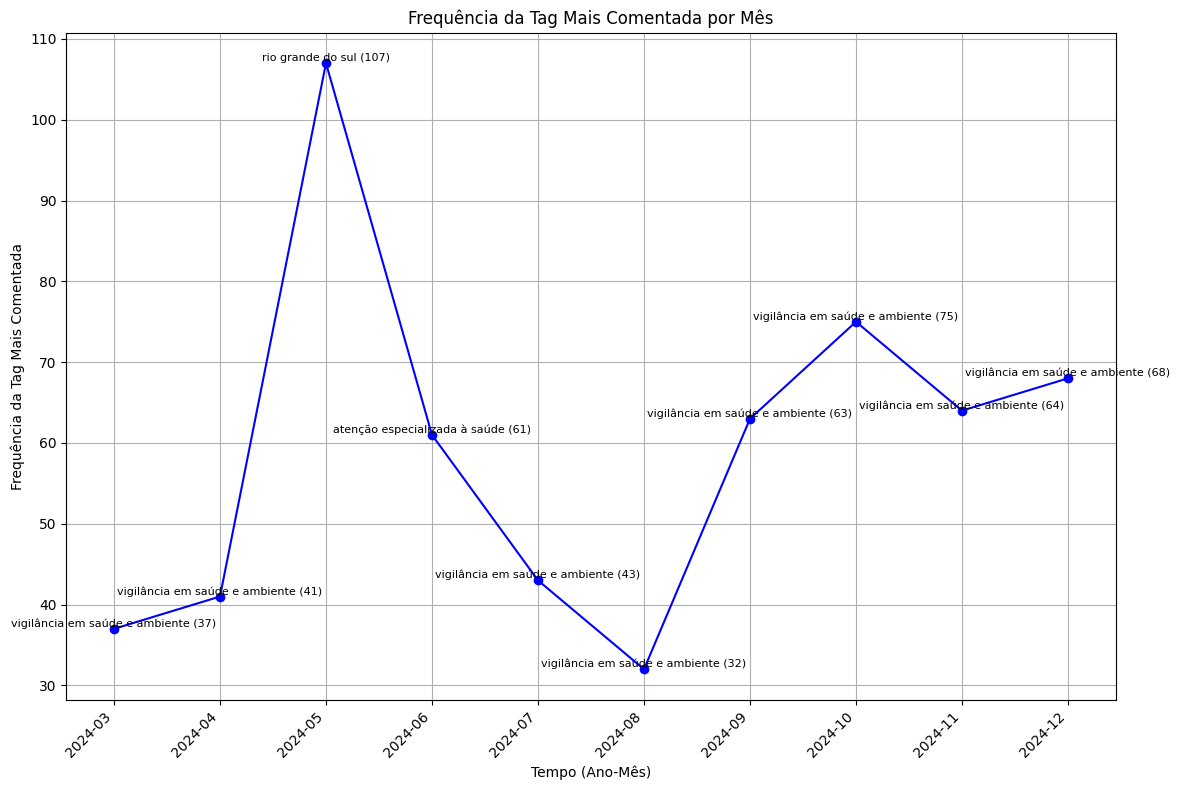

In [ ]:
monthly_tag_counts = df.groupby(["month", "tag"]).size().reset_index(name="count")

most_common_per_month = (monthly_tag_counts.loc[monthly_tag_counts.groupby("month")["count"].idxmax()]
                             .sort_values("month"))

months = most_common_per_month["month"].tolist()
common_tags = most_common_per_month["tag"].tolist()
common_tag_counts = most_common_per_month["count"].tolist()

    # Criando o gráfico
plt.figure(figsize=(12, 8))
plt.plot(months, common_tag_counts, marker="o", linestyle="-", color="b")
for i, count in enumerate(common_tag_counts):
    plt.text(months[i], count, f"{common_tags[i]} ({count})", fontsize=8, ha="center", va="bottom")
plt.xlabel("Tempo (Ano-Mês)")
plt.ylabel("Frequência da Tag Mais Comentada")
plt.title("Frequência da Tag Mais Comentada por Mês")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid(True)
plt.show()


## Analisando Similariedade Textual entre Subtítulos

In [ ]:
# Lista para armazenar os subtítulos
subtitulo = []

# Processar os arquivos JSON
for json_file in data_dir.rglob("*.json"):
    with json_file.open("r", encoding="utf-8") as f:
        data = json.load(f)
        subtitulo_text = data.get("subtitulo", "").strip()  # Garantir que a chave seja lida corretamente
        if subtitulo_text:  # Adicionar subtítulo apenas se não estiver vazio
            subtitulo.append(subtitulo_text)

# Remover duplicatas
subtitulo = list(set(subtitulo))

# Diagnóstico: Verificar os subtítulos extraídos
print(f"Total de subtítulos encontrados: {len(subtitulo)}")
print("Subtítulos únicos:", subtitulo)

# Vetorização com TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(subtitulo)

# Similaridade do cosseno
similarity_matrix = cosine_similarity(tfidf_matrix)

# Criar DataFrame de similaridade
similarity_df = pd.DataFrame(similarity_matrix, index=subtitulo, columns=subtitulo)

# Diagnóstico: Exibir a matriz de similaridade
print("\nMatriz de similaridade entre subtítulos:")
print(similarity_df)

# Identificar subtítulos mais semelhantes
print("\nSubtítulos mais semelhantes:")
for i, category in enumerate(similarity_df.index):
    similarities = similarity_df.iloc[i].sort_values(ascending=False)

    # Verificar se há subtítulos além da própria
    if len(similarities) > 1:
        most_similar = similarities.index[1]  # Ignorar a própria categoria (índice 0)
        similarity_score = similarities.iloc[1]
        print(f"'{category}' é mais semelhante a '{most_similar}' com pontuação {similarity_score:.2f}")
    else:
        print(f"'{category}' não tem outros subtítulos com os quais comparar.")


Total de subtítulos encontrados: 690
Subtítulos únicos: ['GOVERNANÇA E TRANSPARÊNCIA', 'PISO DA ENFERMAGEM', 'VACINA É PRA TODA VIDA', 'PISO DA CATEGORIA', 'RIO GRANDE DO SUL', 'PROQUALI', 'SETEMBRO AMARELO', 'SAÚDE PARA TODOS', 'NOVA TERAPIA', 'CONQUISTA HISTÓRICA', 'ARTICULAÇÃO', 'PPA', 'DESENVOLVIMENTO CIENTÍFICO', 'MAIS CONHECIMENTO', 'CONQUISTA', 'GESTÃO', 'DIREITOS HUMANOS EM SAÚDE', 'FINANCIAMENTO EM SAÚDE', 'PARCERIA PARA O FUTURO', 'MEMÓRIA E REPARAÇÃO', 'VIGILÂNCIA EM SAÚDE', 'DIA NACIONAL DA SAÚDE', 'DIA MUNDIAL SEM TABACO', 'SAÚDE INTEGRAL', 'APRIMORAMENTO', 'RECURSOS FINANCEIROS', 'INOVAÇÃO EM SAÚDE', 'FOCO NA POPULAÇÃO', 'MAIS REMÉDIOS', 'TESTE DO PEZINHO', 'DIA DOS PAIS', 'ENGENHARIA GENÉTICA', 'DIA MUNDIAL DO ALZHEIMER', 'ACESSIBILIDADE', 'GESTÃO DE PESSOAS', 'CONTRA O MOSQUITO', 'GUIA ALIMENTAR', 'DOE VIDA', 'ENFRENTAMENTO À DENGUE', 'PRONON E PRONAS/PCD', 'CENSO', 'COLABORAÇÃO', 'CUIDADO NA INFÂNCIA', 'RECOMENDAÇÕES', 'PRAZO ESTENDIDO', 'QUALIDADE DE VIDA', 'CAPILARID

'NOVO PAC SAÚDE' é mais semelhante a 'NOVO PAC' com pontuação 0.94
'NOVO PAC' é mais semelhante a 'NOVO PAC SAÚDE' com pontuação 0.94
'EM DEBATE' é mais semelhante a 'SAÚDE EM DEBATE' com pontuação 0.92
'SAÚDE EM DEBATE' é mais semelhante a 'EM DEBATE' com pontuação 0.92
'SAÚDE & SOLIDARIEDADE' é mais semelhante a 'SOLIDARIEDADE' com pontuação 0.90
'SOLIDARIEDADE' é mais semelhante a 'SAÚDE & SOLIDARIEDADE' com pontuação 0.90
'CULTURA' é mais semelhante a 'SAÚDE & CULTURA' com pontuação 0.89
'CULTURA' é mais semelhante a 'SAÚDE + CULTURA' com pontuação 0.89
'CULTURA' é mais semelhante a 'CULTURA E SAÚDE' com pontuação 0.89
'SAÚDE & CULTURA' é mais semelhante a 'CULTURA' com pontuação 0.89
'CULTURA E SAÚDE' é mais semelhante a 'CULTURA' com pontuação 0.89
'SAÚDE + CULTURA' é mais semelhante a 'CULTURA' com pontuação 0.89
'INFORMAÇÃO' é mais semelhante a 'SAÚDE & INFORMAÇÃO' com pontuação 0.89
'SAÚDE & INFORMAÇÃO' é mais semelhante a 'INFORMAÇÃO' com pontuação 0.89
'DE VOLTA À CASA' é ma

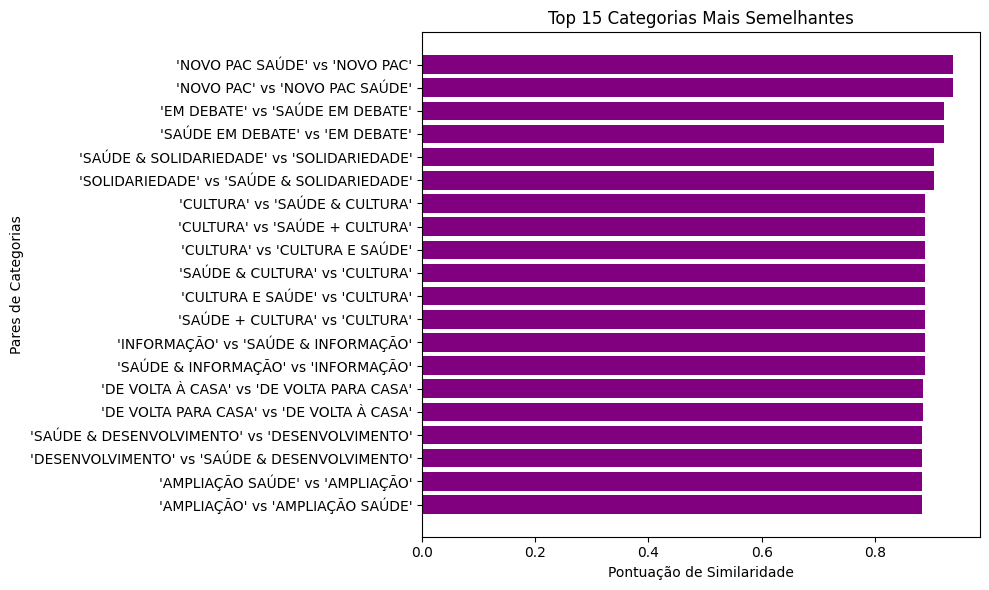

In [ ]:
# Lista para armazenar os pares de categorias mais semelhantes e as pontuações de similaridade
similar_category_pairs = []

# Para cada categoria, identificar as 15 mais semelhantes, excluindo a similaridade 1 (própria categoria)
for category in similarity_df.index:
    similarities = similarity_df.loc[category].sort_values(ascending=False)

    # Excluir a própria categoria (similaridade 1)
    similarities = similarities[similarities < 0.99]  # Filtra similaridades menores que 1

    # Pega as top 15 mais semelhantes
    most_similar = similarities.index[:20]
    most_similar_scores = similarities.iloc[:20]

    # Adiciona os pares de categorias e suas pontuações de similaridade
    for similar_category, score in zip(most_similar, most_similar_scores):
        similar_category_pairs.append((category, similar_category, score))

# Ordenar os pares por pontuação de similaridade, para pegar os pares mais semelhantes
top_similar_pairs = sorted(similar_category_pairs, key=lambda x: x[2], reverse=True)

# Exibir os pares mais semelhantes
for category1, category2, score in top_similar_pairs[:15]:
    print(f"'{category1}' é mais semelhante a '{category2}' com pontuação {score:.2f}")

# Preparando os dados para o gráfico
top_categories = [f"'{category1}' vs '{category2}'" for category1, category2, score in top_similar_pairs[:20]]
scores = [score for category1, category2, score in top_similar_pairs[:20]]

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.barh(top_categories, scores, color='purple')
plt.xlabel("Pontuação de Similaridade")
plt.ylabel("Pares de Categorias")
plt.title("Top 15 Categorias Mais Semelhantes")
plt.gca().invert_yaxis()  # Inverter o eixo Y para exibir a maior pontuação no topo
plt.tight_layout()

# Exibindo o gráfico
plt.show()

## Subtítulos mais semelhantes com base em Tags

In [ ]:

subtitulos = []
tags_texts = []

# Processar os arquivos JSON
for json_file in data_dir.rglob("*.json"):
    with json_file.open("r", encoding="utf-8") as f:
        data = json.load(f)
        subtitulo = data.get("subtitulo", "").strip()  # Garantir que o subtítulo seja lido corretamente
        tags = " ".join(data.get("tags", [])).strip()  # Combinar tags em uma única string
        if subtitulo and tags:  # Apenas se ambos existirem
            subtitulos.append(subtitulo)
            tags_texts.append(tags)

# Vetorização com TF-IDF usando as tags como contexto
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(tags_texts)  # Vetorizar as tags

# Similaridade do cosseno
similarity_matrix = cosine_similarity(tfidf_matrix)

# Criar DataFrame de similaridade
similarity_df = pd.DataFrame(similarity_matrix, index=subtitulos, columns=subtitulos)

# Diagnóstico: Exibir a matriz de similaridade
print("\nMatriz de similaridade entre subtítulos baseada nas tags:")
print(similarity_df)

# Identificar os subtítulos mais semelhantes com base nas tags
print("\nSubtítulos mais semelhantes com base nas tags:")
similar_pairs = []
for i, subtitulo in enumerate(similarity_df.index):
    similarities = similarity_df.iloc[i].sort_values(ascending=False)

    # Verificar se há subtítulos além do próprio
    if len(similarities) > 1:
        most_similar = similarities.index[1]  # Ignorar o próprio subtítulo
        similarity_score = similarities.iloc[1]
        similar_pairs.append((subtitulo, most_similar, similarity_score))
        print(f"'{subtitulo}' é mais semelhante a '{most_similar}' com pontuação {similarity_score:.2f}")
    else:
        print(f"'{subtitulo}' não tem outros subtítulos com os quais comparar.")

similar_pairs_df = pd.DataFrame(similar_pairs, columns=["Subtítulo", "Subtítulo Mais Semelhante", "Pontuação de Similaridade"])
print("\nTabela de pares semelhantes exportada para 'subtitulos_semelhantes_por_tags.csv'.")



Matriz de similaridade entre subtítulos baseada nas tags:
                     ARBOVIROSES  MISSÃO SECA EXTREMA  CHAMADA PÚBLICA  \
ARBOVIROSES             1.000000             0.119697         0.008217   
MISSÃO SECA EXTREMA     0.119697             1.000000         0.009198   
CHAMADA PÚBLICA         0.008217             0.009198         1.000000   
FOCO NO PACIENTE        0.009414             0.010537         0.053508   
MISSÃO SECA EXTREMA     0.119697             1.000000         0.009198   
...                          ...                  ...              ...   
CONSCIENTIZAÇÃO         0.046407             0.008686         0.025056   
QUEIMADAS               0.123600             0.599681         0.017279   
SAÚDE OCULAR            0.016603             0.068414         0.033227   
MALÁRIA                 0.312715             0.173430         0.006948   
SAÚDE & AMBIENTE        0.107994             0.563993         0.008298   

                     FOCO NO PACIENTE  MISSÃO SECA E

In [ ]:
similar_pairs_df

,Subtítulo,Subtítulo Mais Semelhante,Pontuação de Similaridade
0,ARBOVIROSES,ARBOVIROSES,0.865069
1,MISSÃO SECA EXTREMA,QUEIMADAS,1.000000
2,CHAMADA PÚBLICA,SAÚDE MENTAL,0.771215
3,FOCO NO PACIENTE,RIO GRANDE DO SUL,0.342737
4,MISSÃO SECA EXTREMA,QUEIMADAS,1.000000
...,...,...,...
1645,CONSCIENTIZAÇÃO,CONSCIENTIZAÇÃO,1.000000
1646,QUEIMADAS,QUEIMADAS,0.917478
1647,SAÚDE OCULAR,CUIDADOS,0.343381
1648,MALÁRIA,ESTRATÉGIA DE VIGILÂNCIA,0.480306


## Similaridade com IMUNIZAÇÃO

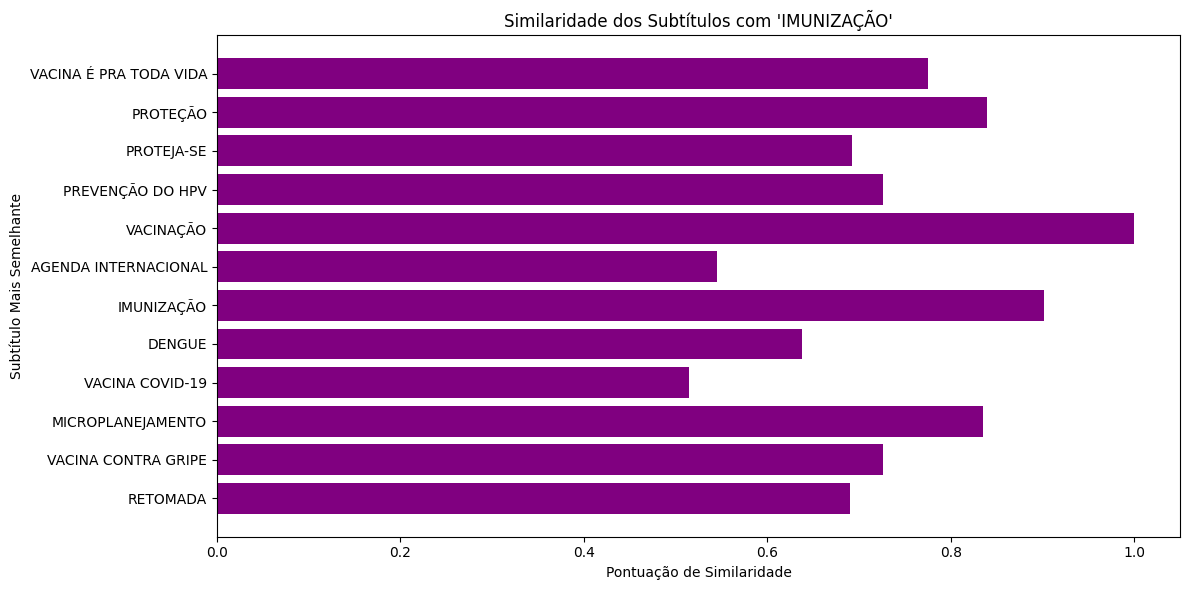

In [ ]:
filtered_df = similar_pairs_df[similar_pairs_df['Subtítulo']=='IMUNIZAÇÃO']

# Plotar gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(filtered_df["Subtítulo Mais Semelhante"], filtered_df["Pontuação de Similaridade"], color="purple")
plt.xlabel("Pontuação de Similaridade")
plt.ylabel("Subtítulo Mais Semelhante")
plt.title("Similaridade dos Subtítulos com 'IMUNIZAÇÃO'")
plt.gca().invert_yaxis()  # Inverter a ordem dos subtítulos no eixo y para melhor visualização
plt.tight_layout()
plt.show()

## Similaridade com RIO GRANDE DO SUL

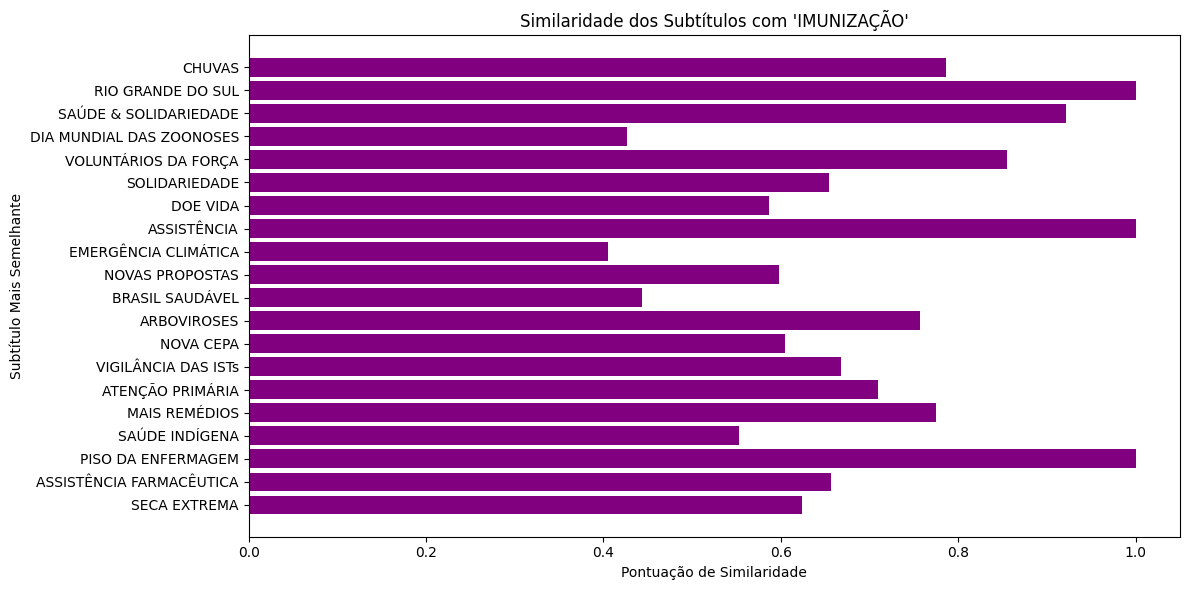

In [ ]:
filtered_df = similar_pairs_df[similar_pairs_df['Subtítulo']=='RIO GRANDE DO SUL']

# Plotar gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(filtered_df["Subtítulo Mais Semelhante"], filtered_df["Pontuação de Similaridade"], color="purple")
plt.xlabel("Pontuação de Similaridade")
plt.ylabel("Subtítulo Mais Semelhante")
plt.title("Similaridade dos Subtítulos com 'IMUNIZAÇÃO'")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Similaridade com MALÁRIAS

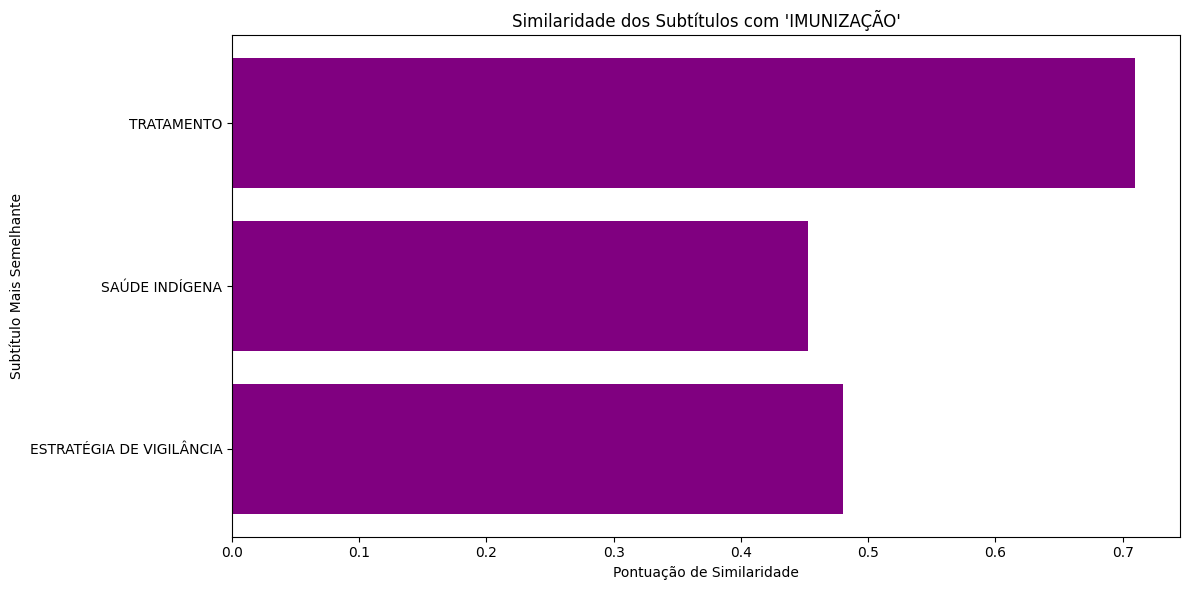

In [ ]:
filtered_df = similar_pairs_df[similar_pairs_df['Subtítulo']=='MALÁRIA']

# Plotar gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(filtered_df["Subtítulo Mais Semelhante"], filtered_df["Pontuação de Similaridade"], color="purple")
plt.xlabel("Pontuação de Similaridade")
plt.ylabel("Subtítulo Mais Semelhante")
plt.title("Similaridade dos Subtítulos com 'IMUNIZAÇÃO'")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

<ipython-input-82-ab4370815049>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_pairs_df["Subtítulo Ordenado"] = filtered_pairs_df.apply(


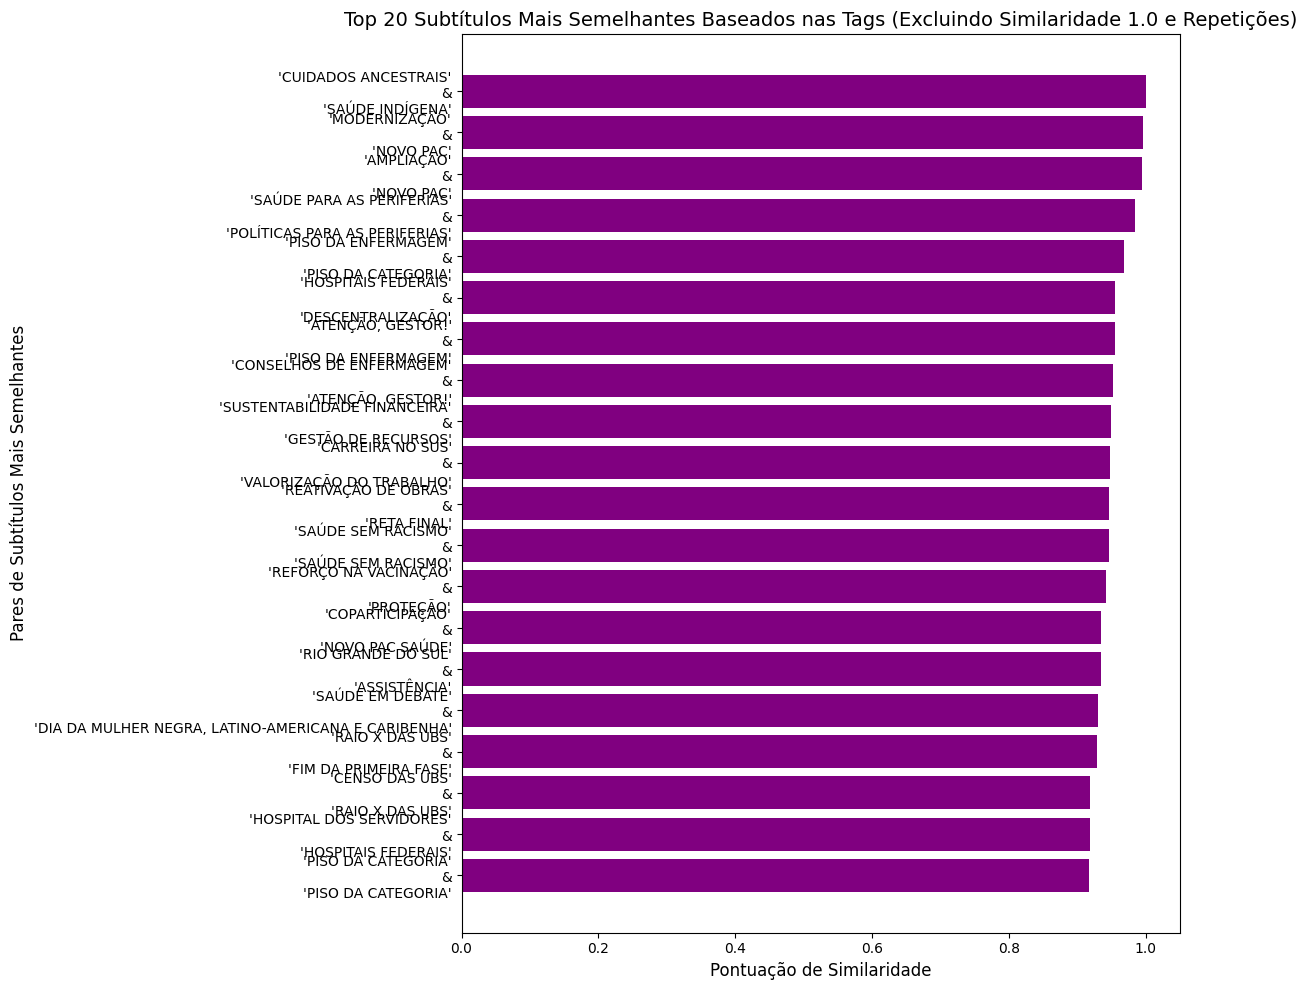

In [ ]:
filtered_pairs_df["Subtítulo Ordenado"] = filtered_pairs_df.apply(
    lambda x: tuple(sorted([x["Subtítulo"], x["Subtítulo Mais Semelhante"]])), axis=1
)
unique_pairs_df = filtered_pairs_df.drop_duplicates(subset=["Subtítulo Ordenado"]).drop(columns=["Subtítulo Ordenado"])

# Filtrar os 20 pares mais semelhantes (excluindo similaridade 1.0)
top_20_unique_pairs = unique_pairs_df.sort_values("Pontuação de Similaridade", ascending=False).head(20)

# Preparar os dados para o gráfico
subtitle_pairs = [f"'{pair[0]}'\n&\n'{pair[1]}'" for pair in zip(
    top_20_unique_pairs["Subtítulo"], top_20_unique_pairs["Subtítulo Mais Semelhante"]
)]
similarity_scores = top_20_unique_pairs["Pontuação de Similaridade"]

# Criar o gráfico
plt.figure(figsize=(12, 10))  # Aumentar o tamanho para acomodar o texto
plt.barh(subtitle_pairs, similarity_scores, color='purple')
plt.xlabel('Pontuação de Similaridade', fontsize=12)
plt.ylabel('Pares de Subtítulos Mais Semelhantes', fontsize=12)
plt.title('Top 20 Subtítulos Mais Semelhantes Baseados nas Tags (Excluindo Similaridade 1.0 e Repetições)', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Ajustar espaçamento entre as barras e inverter a ordem
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Palavras mais frequentes no TEXTO sem considerar de tamanho 2

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Lista para armazenar os textos
texts = []

# Processar os arquivos JSON
for json_file in data_dir.rglob("*.json"):
    with json_file.open("r", encoding="utf-8") as f:
        data = json.load(f)
        texto = data.get("texto", "").strip()  # Obter o texto
        if texto:
            texts.append(texto)

# Criação do contador de palavras
vectorizer = CountVectorizer(stop_words='english', lowercase=True)

# Vetorização dos textos
X = vectorizer.fit_transform(texts)

# Obter a soma das frequências das palavras
word_counts = X.sum(axis=0).A1  # A1 transforma a matriz em array

# Criar um DataFrame com as palavras e suas contagens
word_freq = pd.DataFrame(zip(vectorizer.get_feature_names_out(), word_counts), columns=["Word", "Frequency"])

# Filtrar palavras com 1 ou 2 letras
word_freq = word_freq[word_freq["Word"].apply(lambda x: len(x) > 2)]

# Ordenar as palavras por frequência (decrescente)
word_freq = word_freq.sort_values(by="Frequency", ascending=False)

# Exibir as 40 palavras mais frequentes
top_40_words = word_freq.head(40)
print(top_40_words)


                Word  Frequency
22683          saúde      15764
18512           para      12946
20885            que      10746
5859             com       8903
9428             dos       4227
7709             das       4087
25005            uma       3914
16465     ministério       3708
15731           mais       3555
5970            como       3533
19637            por       3482
23847            sus       2925
17010       nacional       2741
4501          brasil       2137
24009         também       1992
2396            além       1857
19632      população       1806
12013            foi       1776
10335          entre       1742
23337          sobre       1725
23925            são       1720
4008           ações       1718
18949           pelo       1605
19246        pessoas       1578
17553            não       1574
3595         atenção       1421
18894           pela       1409
16881     municípios       1362
17435            nos       1356
12051          foram       1339
20317  p